# #DataEngieering Analysis on Twitter

In [3]:
import os
import json
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
# from secrets import *

## 1. Creating connection with Twitters API

In [4]:
CONSUMER_KEY = 'consumer_key'
CONSUMER_SECRET = 'consumer_secret'
BEARER_TOKEN = 'bearer_token'
ACCESS_TOKEN = 'access_token'
ACCESS_SECRET = 'access_secret'

In [5]:
# authenticate to the service we're accessing
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

## 2. Creating search parameters to analyze tweets

In [12]:
api = tweepy.API(auth)

# specifying search parameters
search_words = 'DataEngineering' or 'dataengineering' + '-filter:retweets'
date_since = '2020-01-01'
language = 'en'

## 3. Extracting with specified parameters tweets

In [86]:
results = []
for tweet in tweepy.Cursor(api.search, q=search_words, lang=language, since=date_since).items(2000):
    results.append(tweet)

## 4. Create a list of all hashtags

In [75]:
hashtags = []
for tweet in range(len(results)):
    hashtag = results[tweet].entities.get('hashtags')
    for i in range(len(hashtag)):
        htag = hashtag[i]['text']
        hashtags.append(htag)

## 5. Put all hashtags into pandas dataframe 

In [76]:
df = pd.DataFrame(hashtags,columns=['Hashtags'])

## 6. Examine count of occurrences of hashtags

In [77]:
hashtag_count = df['Hashtags'].groupby(df['Hashtags']).value_counts(ascending=True).nlargest(5)
print(hashtag_count)

Hashtags         Hashtags       
DataEngineering  DataEngineering    662
MachineLearning  MachineLearning    351
DataScience      DataScience        331
DevOps           DevOps             213
Python           Python             212
Name: Hashtags, dtype: int64


## 7. Data Viz

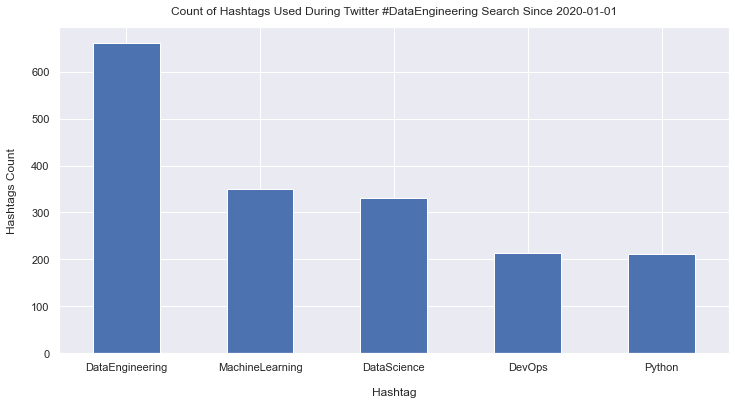

In [81]:
sns.set(font_scale=1.0)
df['Hashtags'].value_counts().nlargest(5).plot(kind='bar', figsize=(12, 6), rot=0)
plt.xlabel("Hashtag", labelpad=14)
plt.ylabel("Hashtags Count", labelpad=14)
plt.title("Top 5 Twitter Hashtags Used with #DataEngineering Since 2020-01-01", y=1.02);